<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Mathematical Tools

## Approximation

In [1]:
import numpy as np
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x  # It is a odd function.

In [14]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [15]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)  

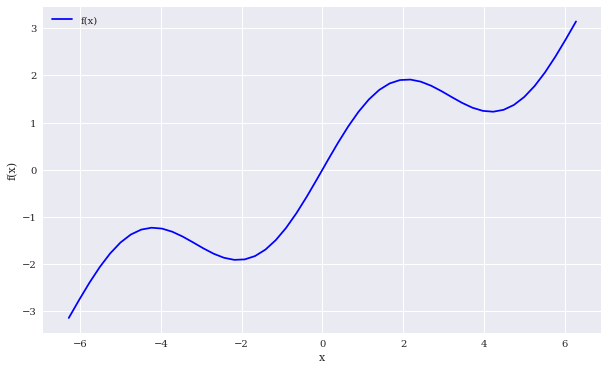

In [7]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_01.png');

### Regression

#### Monomials as Basis Functions
* 单项式作为基础函数
* NumPy has built-in functions for both the determination of the optimal parameters (namely, np.polyfit()) and the evaluation of the approximation given a set of input values (namely, np.polyval())

In [8]:
np.polyfit?

In [9]:
res = np.polyfit(x, f(x), deg=1, full=True)  

In [10]:
res  

(array([ 4.28841952e-01, -7.06541606e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [11]:
ry = np.polyval(res[0], x)  

In [14]:
np.sum((ry-f(x))**2)

21.03238685934332

In [16]:
np.mean((ry-f(x))**2)

0.4206477371868664

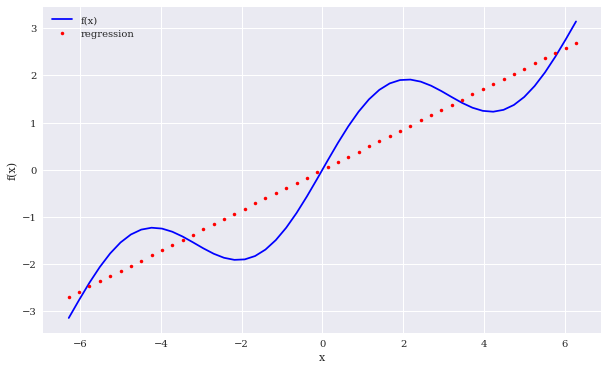

In [15]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_02.png');

In [17]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

In [19]:
reg  # Polynomial coefficients, highest power first.

array([ 1.37920761e-03, -2.68253446e-18, -6.82525072e-02,  1.91378083e-17,
        1.11425209e+00, -1.25113307e-16])

In [21]:
np.mean((f(x)-ry)**2)

0.05388251552308741

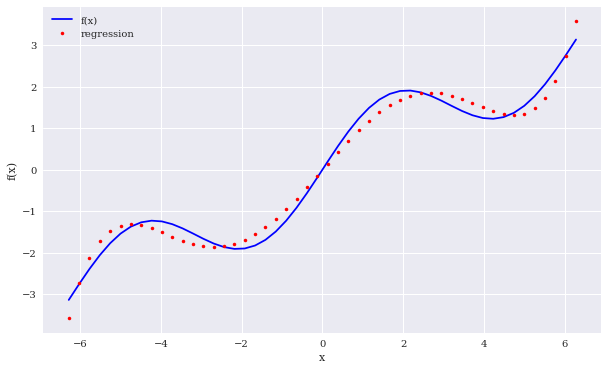

In [18]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_03.png');

In [22]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

In [24]:
reg

array([-5.47508597e-05,  5.24339529e-20,  4.99394999e-03, -2.68987729e-17,
       -1.35368487e-01,  3.00345151e-16,  1.41870278e+00, -4.83516876e-16])

In [28]:
np.allclose(f(x), ry)  

False

In [29]:
np.mean((f(x) - ry) ** 2)  

0.001776913475951772

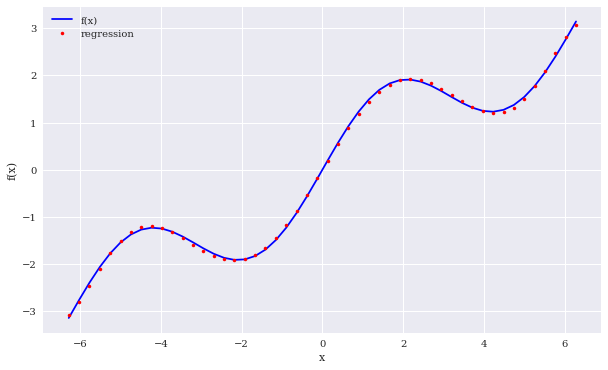

In [30]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_04.png');

#### Individual Basis Functions

In [31]:
matrix = np.zeros((3 + 1, len(x)))  
matrix[3, :] = x ** 3  
matrix[2, :] = x ** 2  
matrix[1, :] = x  
matrix[0, :] = 1  

In [32]:
matrix

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [-6.28

In [34]:
matrix.T.round(2)[:5]

array([[   1.  ,   -6.28,   39.48, -248.05],
       [   1.  ,   -6.03,   36.32, -218.9 ],
       [   1.  ,   -5.77,   33.3 , -192.13],
       [   1.  ,   -5.51,   30.4 , -167.63],
       [   1.  ,   -5.26,   27.64, -145.31]])

In [35]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]  

In [37]:
np.linalg.lstsq?

In [38]:
reg.round(4)  

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [40]:
reg_ = np.polyfit(x, f(x), deg=3)
reg_.round(4)

array([-0.0054, -0.    ,  0.5628,  0.    ])

In [43]:
reg.shape

(4,)

In [44]:
matrix.shape

(4, 50)

In [41]:
ry = np.dot(reg, matrix)  # 向量乘矩阵

In [45]:
ry.shape

(50,)

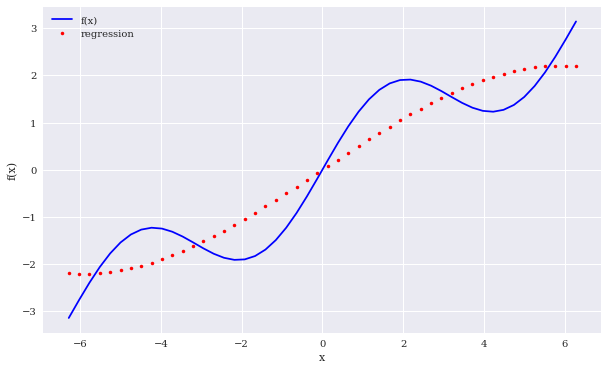

In [46]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_05.png');

In [47]:
matrix[3, :] = np.sin(x)  

In [48]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [49]:
reg.round(4)  

array([0. , 0.5, 0. , 1. ])

In [50]:
ry = np.dot(reg, matrix)

In [51]:
np.allclose(f(x), ry)  

True

In [52]:
np.mean((f(x) - ry) ** 2)  

2.185545300890635e-31

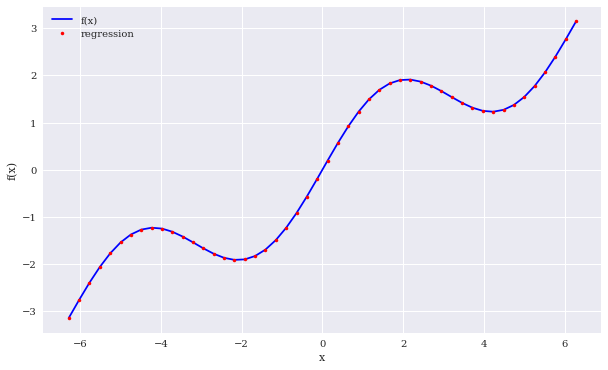

In [53]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_06.png');

#### Noisy Data
* Regression can cope equally well with noisy data, be it data from simulation or from (nonperfect) measurements.
* To illustrate this point, independent observations with noise and dependent observations with noise are generated.

In [54]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)  
xn = xn + 0.15 * np.random.standard_normal(len(xn))  
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))  

In [55]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

In [57]:
np.mean((f(xn)-ry)**2)

0.008068075079120461

In [58]:
np.mean((f(x)-ry)**2)

0.030732237036902386

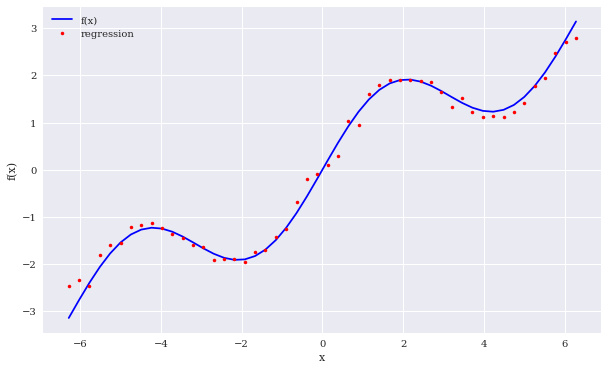

In [59]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_07.png');

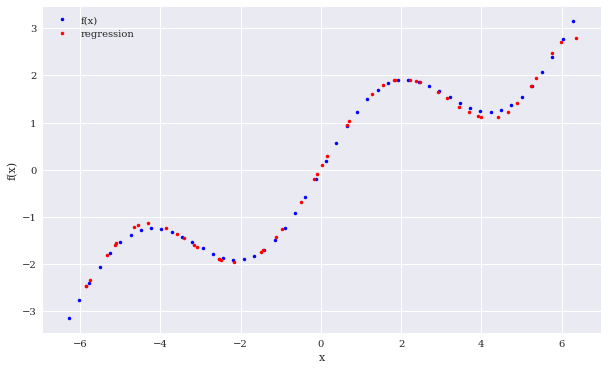

In [60]:
create_plot([x, xn], [f(x), ry], ['b.', 'r.'],
           ['f(x)', 'regression'], ['x', 'f(x)'])

#### Unsorted Data  
* 无序数据

In [61]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi  
yu = f(xu)

In [62]:
print(xu[:10].round(2))  
print(yu[:10].round(2))  

[-1.9   1.   -3.05 -4.95 -5.04 -5.22 -3.39  5.23  3.1   3.84]
[-1.9   1.34 -1.62 -1.5  -1.57 -1.73 -1.45  1.74  1.59  1.28]


In [63]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

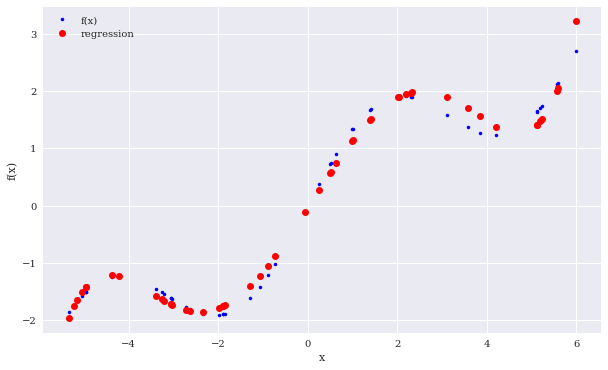

In [64]:
create_plot([xu, xu], [yu, ry], ['b.', 'ro'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_08.png');

#### Multiple Dimensions

In [5]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [6]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)  

In [7]:
X

array([[ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  

In [8]:
np.meshgrid?

In [9]:
Z = fm((X, Y))
x = X.flatten()  
y = Y.flatten()  

In [10]:
Z.shape

(20, 20)

In [11]:
x.shape

(400,)

In [12]:
y.shape

(400,)

In [13]:
from mpl_toolkits.mplot3d import Axes3D  

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_09.png');

RuntimeError: In FT2Font: Can not load face.

<Figure size 720x432 with 2 Axes>

In [83]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)  
matrix[:, 5] = np.sin(x)  
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [90]:
matrix.shape

(400, 7)

In [92]:
fm((x, y)).shape

(400,)

In [93]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

In [95]:
reg.shape

(7,)

In [96]:
RZ = np.dot(matrix, reg).reshape((20, 20))  

In [97]:
np.allclose(RZ, Z)

True

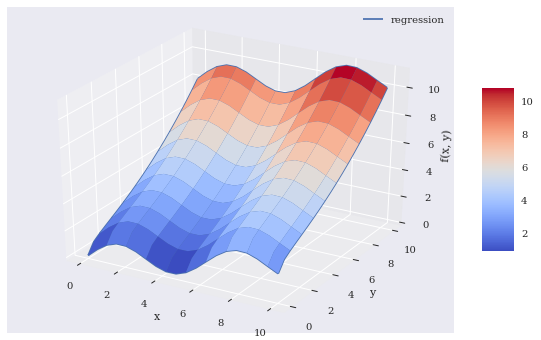

In [98]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)  
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_10.png');

### Interpolation

In [5]:
import scipy.interpolate as spi  

In [6]:
import numpy as np

In [17]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [8]:
def f(x):
    return np.sin(x) + 0.5 * x

In [18]:
ipo = spi.splrep(x, f(x), k=1)  

In [110]:
spi.splrep?

In [19]:
ipo # Sequence of length 3 returned by splrep() (knots, coefficients, degree)

(array([-6.28318531, -6.28318531, -5.75958653, -5.23598776, -4.71238898,
        -4.1887902 , -3.66519143, -3.14159265, -2.61799388, -2.0943951 ,
        -1.57079633, -1.04719755, -0.52359878,  0.        ,  0.52359878,
         1.04719755,  1.57079633,  2.0943951 ,  2.61799388,  3.14159265,
         3.66519143,  4.1887902 ,  4.71238898,  5.23598776,  5.75958653,
         6.28318531,  6.28318531]),
 array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
        -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
        -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
         1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
         1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265,
         0.        ,  0.        ]),
 1)

In [20]:
iy = spi.splev(x, ipo)  # Derives the interpolated values

In [21]:
np.allclose(f(x), iy)  

True

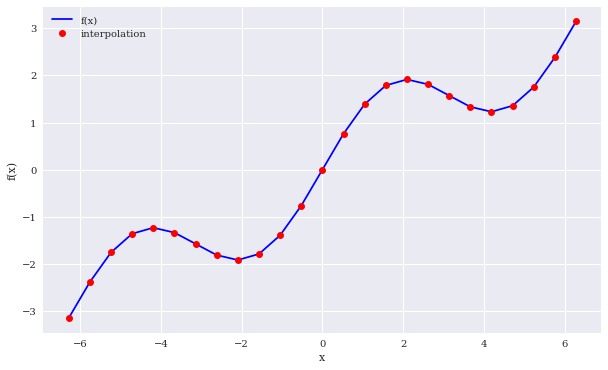

In [22]:
create_plot([x, x], [f(x), iy], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_11.png');

In [23]:
xd = np.linspace(1.0, 3.0, 50)  
iyd = spi.splev(xd, ipo)

In [24]:
np.allclose(iyd, f(xd))

False

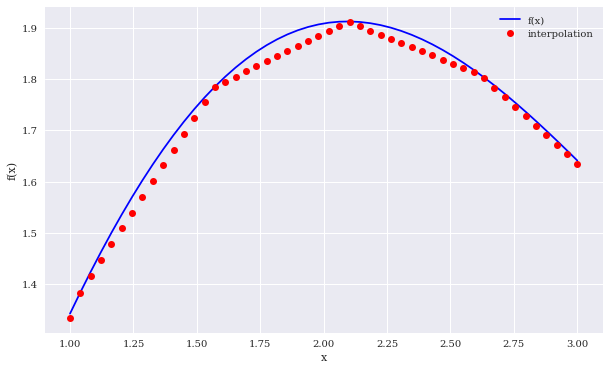

In [25]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_12.png');

In [26]:
ipo = spi.splrep(x, f(x), k=3)  
iyd = spi.splev(xd, ipo)  

In [27]:
np.allclose(f(xd), iyd)  

False

In [28]:
np.mean((f(xd) - iyd) ** 2)  

1.1349319851436252e-08

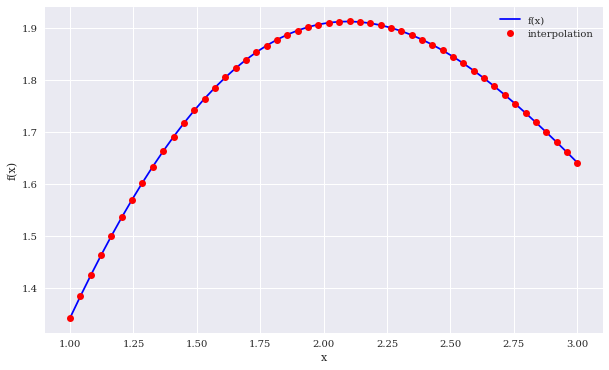

In [29]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_13.png');

## Convex Optimization
* Examples are the calibration of option pricing models to market data or the optimization of an agent's utility function.

In [30]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

In [31]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

In [32]:
X

array([[-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       ...,
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ]])

In [33]:
fig.gca?

Object `fig.gca` not found.


In [34]:
import mpl_toolkits.mplot3d

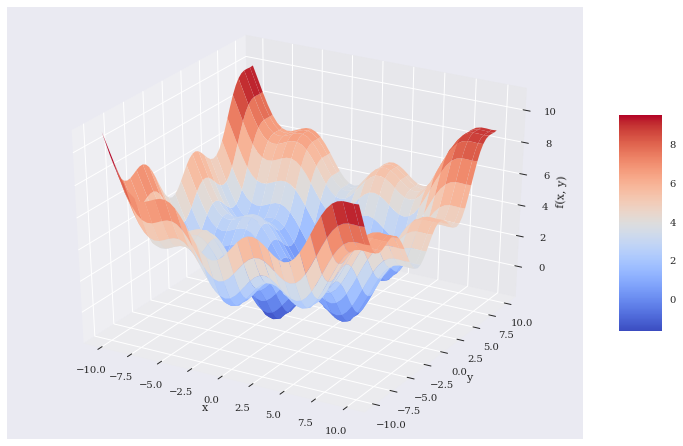

In [35]:
fig = plt.figure(figsize=(10, 6))
# ax = fig.gca(projection='3d')
# ax = fig.gca()
# ax = plt.axes(projection='3d')
ax = mpl_toolkits.mplot3d.Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_14.png');

### Global Optimization
* Uses sco.brute()from scipy.optimize

In [36]:
import scipy.optimize as sco  

In [37]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z))  
    return z

In [21]:
sco?

In [38]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)  

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [39]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

In [40]:
opt1

array([-1.4, -1.4])

In [41]:
fm(opt1)

-1.7748994599769203

### Local Optimization
* The local convex optimization usually follows draws on the results from the global optimization.
* The function sco.fmin() takes as input the fucntion to minimize and the starting parameter values.

In [42]:
sco.fmin?

In [43]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,
                maxiter=15, maxfun=20)  

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


In [44]:
opt2

array([-1.42702972, -1.42876755])

In [45]:
fm(opt2)

-1.7757246992239009

In [47]:
output = False
opt2_ = sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


In [48]:
fo((2.0, 2.0))

2.2185948536513633

In [50]:
fo(opt2_)

0.0158257532746805

### Constrained Optimization
* scipy.optimize.minimize()
* This function takes as input--in addition to the functions be minimized--conditions in the form of equalities and inequalities(as a list of dict objects) as well as boundaries for the parameters (as a tuple of tuple objects).

In [53]:
sco.minimize?

In [54]:
import math

In [55]:
def Eu(p):  
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) +
             0.5 * math.sqrt(s * 5 + b * 12))

In [56]:
cons = ({'type': 'ineq',
         'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})  

In [57]:
bnds = ((0, 1000), (0, 1000))  

In [58]:
result = sco.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)  

In [59]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [77]:
result['x']  

array([8.02547122, 1.97452878])

In [78]:
-result['fun']  

9.700883611487832

In [79]:
np.dot(result['x'], [10, 10])  

99.99999999999999

## Integration

In [61]:
import scipy.integrate as sci

In [62]:
def f(x):
    return np.sin(x) + 0.5 * x

In [63]:
x = np.linspace(0, 10)
y = f(x)
a = 0.5  
b = 9.5  
Ix = np.linspace(a, b)  
Iy = f(Ix)  #  <4>

In [64]:
from matplotlib.patches import Polygon

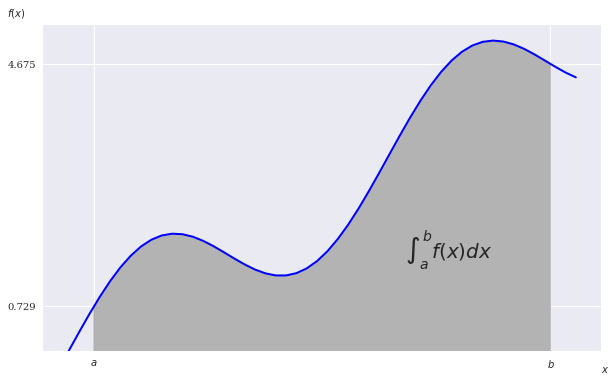

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)]);
# plt.savefig('../../images/ch11/math_15.png');

### Numerical Integration
* The scipy.integrate subpackage contains a selection of functions to numericaly integrate a given mathematical function for upper and lower integration limits.
* Examples are sci.fixed_quad()for fixed Gaussian quadrature, sci.quad()for adaptive quadrature, and sci.romberg()for Romberg integration.
* There are also a number of integration functions that takes as input list or ndarray objects with function values and input values, respectively.
* Examples in this regard are sci.trapz(), using the trapezoidal rule, and sci.simps(), implementing Simpson's rule

In [66]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [67]:
sci.quad(f, a, b)[0]

24.374754718086752

In [68]:
sci.romberg(f, a, b)

24.374754718086713

In [69]:
xi = np.linspace(0.5, 9.5, 25)

In [70]:
sci.trapz(f(xi), xi)

24.352733271544516

In [71]:
sci.simps(f(xi), xi)

24.37496418455075

### Integration by Simulation
* Draw I random values of x between the integral limits and evaluate the integration function at every random value for x.
* Sum up all the function values and take the average to arrive at an average function value over the integration interval.
* Multiply this  value by the length of the integration interval to derive an estimate for the integral value.

In [76]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a  #0-1之间随机数平移到a-b之间
    print(np.mean(f(x)) * (b - a))  #函数的平均高度乘以宽度模拟积分

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


## Symbolic Computation

### Basics

In [78]:
import sympy as sy

In [79]:
x = sy.Symbol('x')  
y = sy.Symbol('y')  

In [80]:
type(x)

sympy.core.symbol.Symbol

In [81]:
sy.sqrt(x)  

sqrt(x)

In [82]:
sy.exp(x)

exp(x)

In [83]:
3 + sy.sqrt(x) - 4 ** 2  

sqrt(x) - 13

In [84]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2  

In [85]:
sy.simplify(f)  

1.5*x**2 + 4.5

In [88]:
sy.init_printing(pretty_print=True, use_unicode=False)

In [89]:
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [90]:
sy.pretty?

In [91]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [92]:
%time pi_str = str(sy.N(sy.pi, 400000))  

Wall time: 11.3 s


In [93]:
pi_str

'3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201

In [94]:
pi_str[:42]  

'3.1415926535897932384626433832795028841971'

In [95]:
pi_str[-40:]  

'8245672736856312185020980470362464176199'

In [96]:
%time pi_str.find('061072')  

Wall time: 0 ns


In [102]:
%time pi_str.find('180992')  

Wall time: 1e+03 µs


### Equations

In [103]:
sy.solve(x ** 2 - 1)

In [104]:
sy.solve(x ** 2 - 1 - 3)

In [105]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

In [106]:
sy.solve(x ** 2 + y ** 2)

### Integration and Differentiation

In [107]:
a, b = sy.symbols('a b')  

In [108]:
I = sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))  

In [115]:
print(sy.pretty(I))  

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [116]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)  

In [117]:
print(sy.pretty(int_func))  

      2         
0.25*x  - cos(x)


In [118]:
Fb = int_func.subs(x, 9.5).evalf()  
Fa = int_func.subs(x, 0.5).evalf()  

In [120]:
Fb - Fa  

In [121]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))  

In [123]:
print(sy.pretty(int_func_limits))  

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [124]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()  

In [125]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))  

### Differentiation

In [126]:
int_func.diff()

In [127]:
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.sin(y) + 0.05 * y ** 2)  

In [128]:
del_x = sy.diff(f, x)  
del_x  

In [129]:
del_y = sy.diff(f, y)  
del_y  

In [130]:
xo = sy.nsolve(del_x, -1.5)  # Educated guesses for the roots and resulting optimal values.
xo  

In [131]:
yo = sy.nsolve(del_y, -1.5)  
yo  

In [132]:
f.subs({x : xo, y : yo}).evalf()  

In [135]:
xo = sy.nsolve(del_x, 4.0)
xo

In [136]:
yo = sy.nsolve(del_y, 4.0)  
yo

In [137]:
f.subs({x : xo, y : yo}).evalf()  

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>